In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import jarque_bera
import pandas as pd
from utils import *

In [2]:
datadir = "/root/codespace/quant-finance-lectures/amarstock_adjusted_data/daily"
print(get_top20_stocks(path=datadir))

[('00DS30', 3084026774000.0), ('00DSES', 2132060774800.0), ('00DSEX', 3370925421616.0), ('1JANATAMF', 233585572.0), ('1STPRIMFMF', 332978314.0), ('AAMRANET', 148017730.0), ('AAMRATECH', 683394625.0), ('ABB1STMF', 256367920.0), ('ABBANK', 769581974.0), ('ACFL', 104802917.0), ('ACI', 94419722.0), ('ACIFORMULA', 126512844.0), ('ACMELAB', 53292422.0), ('ACTIVEFINE', 848206734.0), ('ADNTEL', 51799485.0), ('ADVENT', 237026778.0), ('AFCAGRO', 336544932.0), ('AFTABAUTO', 297630571.0), ('AGNISYSL', 567261957.0), ('AGRANINS', 25712648.0)]


In [3]:
stockname = '00DS30'
df = get_prices(stockname, path=datadir) 
returns = get_returns(dataframe=df, field='close')

The JB test p-value is: 0.0
We reject the hypothesis that the data are normally distributed: True
The skewness of the returns is: 0.11774664169130825
The kurtosis of the returns is: 20.27899183718158


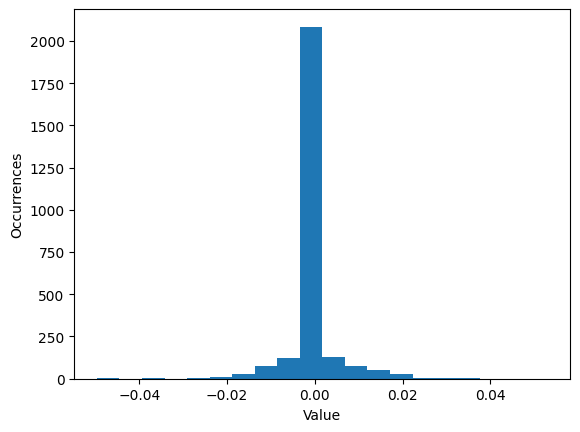

In [5]:
#Set a cutoff
cutoff = 0.01

# Get the p-value of the JB test
_, p_value, skewness, kurtosis = jarque_bera(returns)
print("The JB test p-value is:", p_value)
print("We reject the hypothesis that the data are normally distributed:", p_value < cutoff)
print("The skewness of the returns is:", skewness)
print("The kurtosis of the returns is:", kurtosis)
plt.hist(returns, bins=20)
plt.xlabel('Value')
plt.ylabel('Occurrences');

In [6]:
# Take the sample mean and standard deviation of the returns
sample_mean = np.mean(returns)
sample_std_dev = np.std(returns)

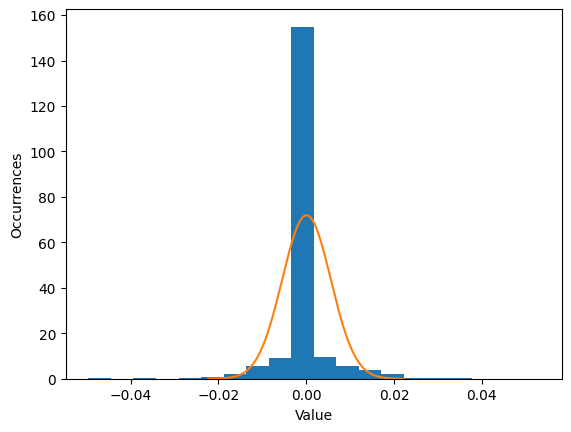

In [7]:
x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))
sample_distribution = ((1/np.sqrt(sample_std_dev * sample_std_dev * 2 * np.pi)) * 
                       np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std_dev * sample_std_dev)))
plt.hist(returns, bins=20, density=True);
plt.plot(x, sample_distribution)
plt.xlabel('Value')
plt.ylabel('Occurrences');